<a href="https://colab.research.google.com/github/Theoph-ay/pytorch_tutorials/blob/main/01_pytorch_workflows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch workflow

In [1]:
#libraries
import torch
from torch import nn #nn contains all the building blocks for pytorch neurak network
import matplotlib.pyplot as plt

#check PyTorch Version
torch.__version__

'2.9.0+cpu'

## 1. Data (Preparing and loading)

In [2]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

### Splitting data into training and test set
very important

In [4]:
# Create a train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Visualization

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #Are there predictions?
  if predictions is not None:
    #plot predictions in red (predictions in same scale as labels)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  #show the legend
  plt.legend(prop={"size": 14})

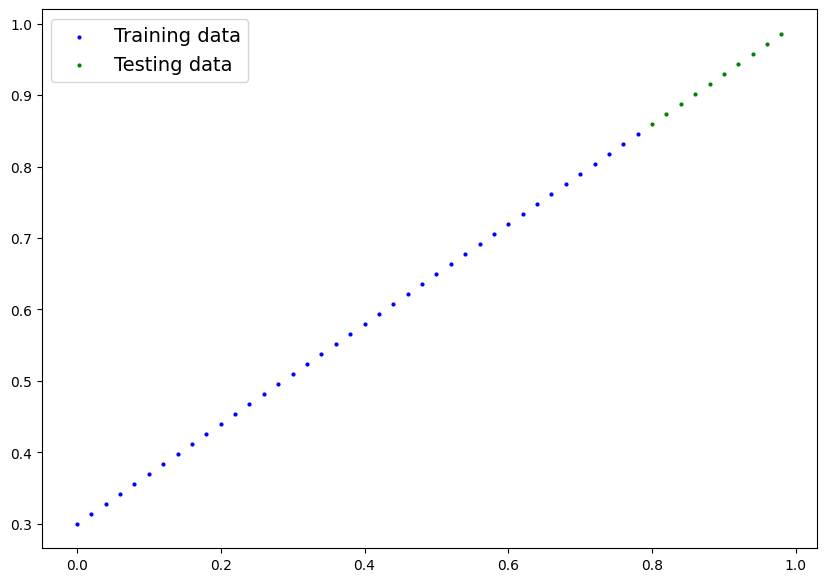

In [6]:
plot_predictions()

## Building first pytorch model

In [7]:
import torch
from torch import nn
# Create a linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)

  def __init__(self): # <- on instantiation/initialization of an object/instance of this class, this will run
    super().__init__()
    # Create a random initial weight and bias values
    self.weight = nn.Parameter(torch.randn(1,
                                          dtype=torch.float),
                               requires_grad=True)

    self.bias = nn.Parameter(torch.randn(1,
                                        dtype=torch.float),
                             requires_grad=True)

  # Forward method
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

In [8]:
#Create a random seed
torch.manual_seed(42)

#create an instance of of the model (this is a subclass of nn.module)
model_0 = LinearRegressionModel()

#Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# List named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

### making predictions with "torch.inference_mode()"

In [10]:
#make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

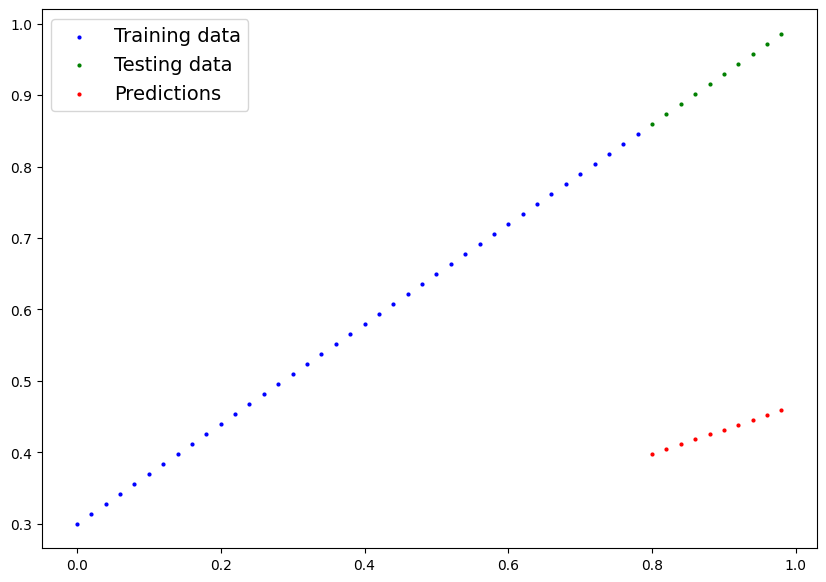

In [11]:
plot_predictions(predictions=y_preds)

## Train model

* Check loss function
* Optimizer

In [12]:
#setup a loss function
loss_fn = nn.L1Loss()

#setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)


### Building a training and testing loop in pytorch

things needed
* loop through data
* forward pass
* calculate the loss
* Optimizer zero grad
* loss backward
* Optimizer step


In [13]:
torch.manual_seed(42)
#an epoch is one loop through the data.....
epochs = 200

#Track different calues
epoch_count = []
loss_values = []
test_loss_values = []

## trainng
# loop through the data
for epoch in range(epochs):
  #set model to training mode
  model_0.train()

  # Forward pass
  y_pred = model_0(X_train)

  # Calculate loss
  loss = loss_fn(y_pred, y_train)

  #optimizer zero grad
  optimizer.zero_grad()

  #loss backward
  loss.backward()

  #optimizer step
  optimizer.step()
  # Testing
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

  #Print out whats happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

    #Print out the model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict({'weight': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict({'weight': tensor([0.3796]), 'bias': tensor([0.2388])})
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict({'weight': tensor([0.4184]), 'bias': tensor([0.3333])})
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict({'weight': tensor([0.4512]), 'bias': tensor([0.3768])})
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict({'weight': tensor([0.4748]), 'bias': tensor([0.3868])})
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict({'weight': tensor([0.4938]), 'bias': tensor([0.3843])})
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict({'weight': tensor([0.5116]), 'bias': tensor([0.3788])})
Epoch: 70 | Loss: 0.034760899

/tmp/ipython-input-1001680763.py:2: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  plt.plot(epoch_count, torch.tensor(loss_values).detach().numpy(), label="Train loss")


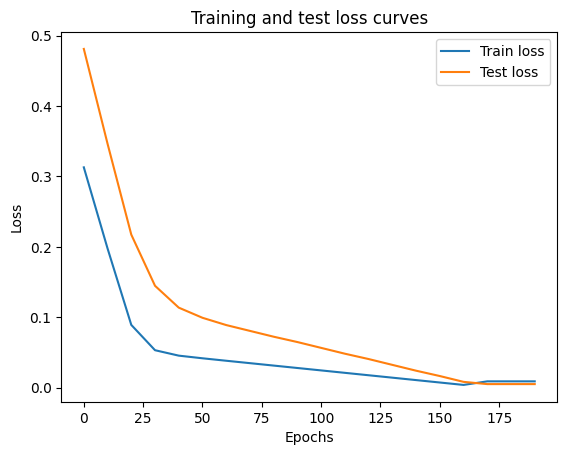

In [14]:
# Plot the loss curves
plt.plot(epoch_count, torch.tensor(loss_values).detach().numpy(), label="Train loss")
plt.plot(epoch_count, torch.tensor(test_loss_values).numpy(), label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [15]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

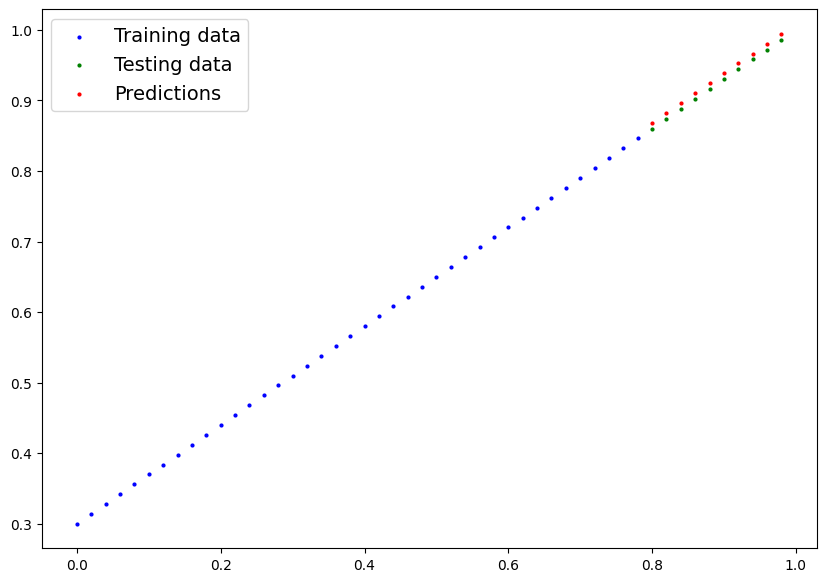

In [16]:
plot_predictions(predictions=y_preds)

## Saving a model in pytorch

1. "torch.save()"

2. "torch.load()"
3. "torch.nn.Module.load_state_dict()

In [17]:
# Saving our Pytorch model
from pathlib import Path

# Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Model save path: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Model save path: models/01_pytorch_workflow_model.pth


## loading a pytorch model

In [18]:
# to load in a state dict, instantiate a new instance of out model

loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [19]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

### Putting it all together

In [20]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [21]:
weight = 0.6
bias = 0.3

torch.manual_seed(7)

x = torch.arange(0, 5, 0.04).unsqueeze(dim=1)
y = x*weight + bias


In [22]:
train_split = int(0.8 * len(x))
X_train, y_train = x[: train_split], y[: train_split]
X_test, y_test = x[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(100, 100, 25, 25)

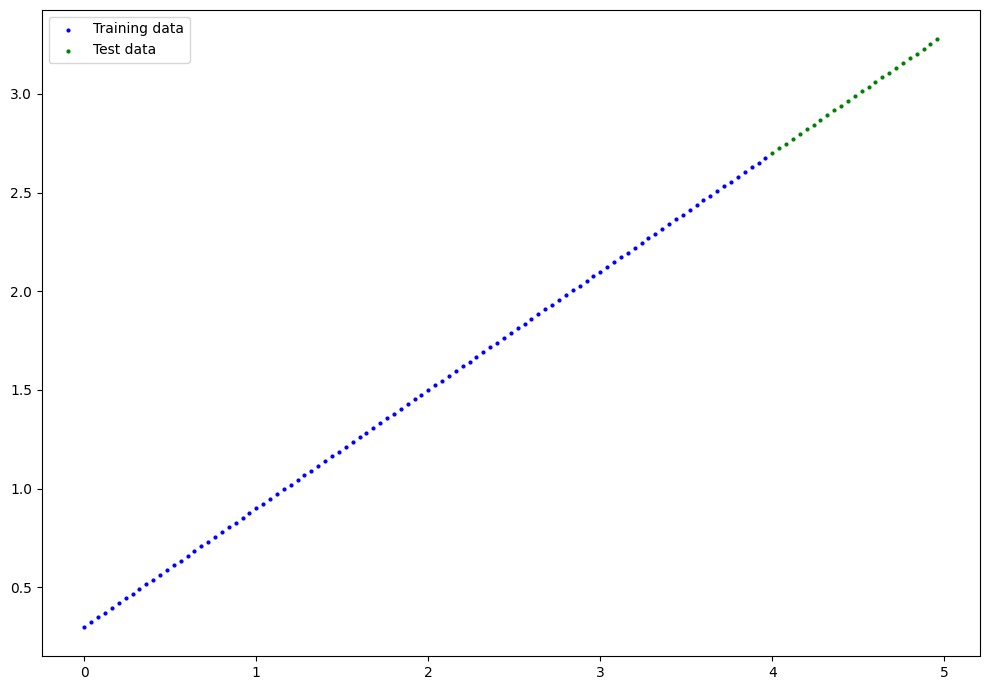

In [23]:
#define plot function with its parameters
def plot_predictions(train_data = X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions = None):
  #plot size
  plt.figure(figsize=(10,7))
  #plot training data
  plt.scatter(train_data, train_label, c="b", s=4, label="Training data")
  #plot test data
  plt.scatter(test_data, test_label, c="g", s=4, label = "Test data")
  #plot predictions if it is present
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions")
  plt.tight_layout()
  plt.legend()
  plt.show()


plot_predictions()

In [24]:
#create our model
class LinearRegressionModelV(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1, out_features=1)
  #Front propagation
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [25]:
model_1 = LinearRegressionModelV()

In [33]:
#set manual seed
torch.manual_seed(7)
#set loss function
loss_fn = nn.L1Loss()
#set optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:

    epoch_count.append(epoch)
    loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())

    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

model_1.state_dict()

Epoch: 0 | Loss: 1.952100396156311 | Test Loss: 3.178783655166626
Epoch: 10 | Loss: 1.460060715675354 | Test Loss: 2.191744089126587
Epoch: 20 | Loss: 0.968020498752594 | Test Loss: 1.2047038078308105
Epoch: 30 | Loss: 0.4759804904460907 | Test Loss: 0.2176634967327118
Epoch: 40 | Loss: 0.21892327070236206 | Test Loss: 0.3052960932254791
Epoch: 50 | Loss: 0.2026406079530716 | Test Loss: 0.3104632496833801
Epoch: 60 | Loss: 0.18723486363887787 | Test Loss: 0.28904402256011963
Epoch: 70 | Loss: 0.17184898257255554 | Test Loss: 0.2649875581264496
Epoch: 80 | Loss: 0.15646307170391083 | Test Loss: 0.24093128740787506
Epoch: 90 | Loss: 0.14107726514339447 | Test Loss: 0.21687480807304382
Epoch: 100 | Loss: 0.12569136917591095 | Test Loss: 0.1928182989358902
Epoch: 110 | Loss: 0.11030422151088715 | Test Loss: 0.16876205801963806
Epoch: 120 | Loss: 0.09491544961929321 | Test Loss: 0.14470557868480682
Epoch: 130 | Loss: 0.07952658087015152 | Test Loss: 0.12064919620752335
Epoch: 140 | Loss: 0.

OrderedDict([('linear_layer.weight', tensor([[0.6021]])),
             ('linear_layer.bias', tensor([0.2896]))])

In [35]:
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds[:10]

tensor([[2.6982],
        [2.7223],
        [2.7464],
        [2.7705],
        [2.7945],
        [2.8186],
        [2.8427],
        [2.8668],
        [2.8909],
        [2.9150]])

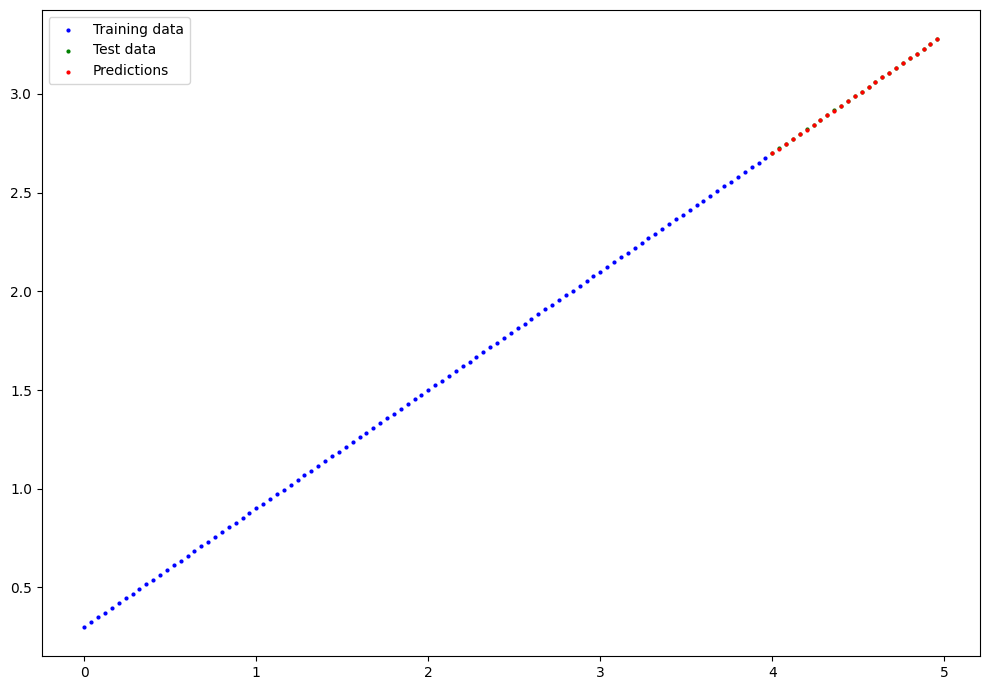

In [37]:
plot_predictions(predictions=y_preds)

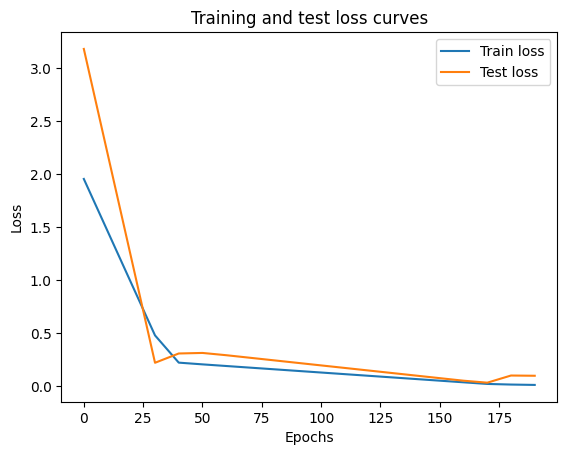

In [38]:
plt.plot(epoch_count, loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [39]:
from pathlib import Path

model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)

model_name = "model_1.pth"
model_save_path = model_path / model_name

print(f"Model Save Path : {model_save_path}")
torch.save(obj=model_1.state_dict(), f=model_save_path)

Model Save Path : models/model_1.pth


In [40]:
loaded_model_1 = LinearRegressionModelV()
loaded_model_1.load_state_dict(torch.load(model_save_path))

<All keys matched successfully>

In [42]:
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

loaded_model_1_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])